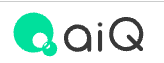

[disclaimer](../../disclaimer.txt/)

# aiQ Geolocation Data Loader Demo

### Step1: Import Library

In [1]:
import os
import numpy as np
import pandas as pd

from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.ALTERNATIVE import (
    load_alternative_aiq_geolocation_universe,
    load_alternative_aiq_geolocation_place_id,
    load_alternative_aiq_geolocation_data
)

In [2]:
ENV_DATABSE = 'TRIAL_SNOWFLAKE_DATABASE_AIQ_GEOLOCATION'
db_name = os.environ.get(ENV_DATABSE)

## Step2: Define Universe from Alt Data

### `load_alternative_aiq_geolocation_universe`  

In [3]:
sdh = DAL()
load_alternative_aiq_geolocation_universe(sdh, language='JP', ticker = '1332', db_name=db_name).retrieve()

,LEI,PERM_ID,FIGI,TICKER,COMPANY_NAME
0,529900MPH5BMANQ3EC50,1-4295877344,BBG000BH5GX2,1332,日本水産


### Data Access handler load
Load the data to memory

same return as **load_alternative_aiq_geolocation_universe** 
```
load_alternative_aiq_geolocation_universe(sdh, language='EN', ticker = '1332').retrieve()
```

In [4]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='universe',
    language='EN', 
    ticker = ['1332'],
    db_name=db_name
)
dfsyms = sdh.retrieve()
dfsyms

,LEI,PERM_ID,FIGI,TICKER,COMPANY_NAME
0,529900MPH5BMANQ3EC50,1-4295877344,BBG000BH5GX2,1332,Nippon Suisan Kaisha Ltd


## Step2: Define Place ID from Alt Data
aiQ Geolocation allows you to have granular views on activities at each place of your interest. <br>
Here is how you can find by ticker which places are covered within the dataset.

### `load_alternative_aiq_geolocation_place_id`  

In [5]:
load_alternative_aiq_geolocation_place_id(sdh, language='JP', ticker = '1332', db_name=db_name).retrieve().head()

,TICKER,FIGI,PLACE_ID,FACILITY_NAME,PREFECTURE,FACILITY_ADDRESS,SECTOR,SECTOR_NAME
0,1332,BBG000BH5GX2,ChIJD7PhtfYBGWARrhufnU3jF88_1332,日本クッカリー 厚木工場,神奈川県,神奈川県 厚木市 上依知 3023,999,他に分類されない食料品製造業
1,1332,BBG000BH5GX2,ChIJEaOVRchTm18RpNpHMSH00Us_1332,デルマール 八戸工場,青森県,青森県 八戸市 築港街 1丁目 2-8,995,冷凍調理食品製造業
2,1332,BBG000BH5GX2,ChIJkZV6kdaMQDURY4sNjTUxLaM_1332,日豊食品工業 城南冷凍工場,熊本県,熊本県 熊本市 南区 城南町 築地 624-19,926,冷凍水産食品製造業
3,1332,BBG000BH5GX2,ChIJOScjAbt_GGARHdeBFz9v3Tg_1332,日本水産 船橋加工工場,千葉県,千葉県 船橋市 浜町 3丁目 4-1,995,冷凍調理食品製造業
4,1332,BBG000BH5GX2,ChIJ8Smpo_j9ImARJTEPPV6ZX2E_1332,日本水産 鹿島油脂工場・鹿島医薬品工場,茨城県,茨城県 神栖市 東深芝 18-2,995,冷凍調理食品製造業


### Data Access handler load
You can achieve the same thing by using `load` method of `sdh` with meta_data=`place_id` set.

In [6]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='place_id',
    language='EN', 
    ticker = ['1332'],
    db_name=db_name
)
dfplaceid = sdh.retrieve()
dfplaceid.head()

,TICKER,FIGI,PLACE_ID,FACILITY_NAME,PREFECTURE,FACILITY_ADDRESS,SECTOR,SECTOR_NAME
0,1332,BBG000BH5GX2,ChIJhVZgw7Zr5TQRJJhr2KMZ-nw_1332,Japan Cookery Okinawa Factory,Okinawa,"2-1-2 Irijima, Urasoe City, Okinawa Prefecture",999,"Food and related products, n.e.c"
1,1332,BBG000BH5GX2,ChIJ_bPaPUp4ajURUxP__3rXfmU_1332,Kaneko Sangyo Foods No. 2 Factory,Saga,"1-8 Nakanosedori, Karatsu City, Saga Prefecture",1062,Elemental feeds
2,1332,BBG000BH5GX2,ChIJD7PhtfYBGWARrhufnU3jF88_1332,Japan Cookery Atsugi Factory,Kanagawa,"3023 Kamiechi, Atsugi City, Kanagawa Prefecture",999,"Food and related products, n.e.c"
3,1332,BBG000BH5GX2,ChIJEaOVRchTm18RpNpHMSH00Us_1332,Delmar Hachinohe Factory,Aomori,"1-2-8 Chikukogai, Hachinohe City, Aomori Prefe...",995,Precooked frozen packed foods
4,1332,BBG000BH5GX2,ChIJVVWl7qhVVjURIEuKa8uybNU_1332,Kyowa Fisheries Machinery Factory,Tottori,"110 Yayoicho, Sakaiminato City, Tottori Prefec...",981,"Animal and vegetable oils and fats, except pro..."



## Step4: Load Alternative Data
### `load_alternative_aiq_geolocation_data`  
Finally we use this method to load the actual time series data. <br>
You can select data by `ticker` or `place_id`.
- 'geofence': observations for 24 hours basis
- 'geofence_ot': observations for only mid night hours (11pm to 5am in Japan)

In [7]:
sdh = load_alternative_aiq_geolocation_data(
        sdh,
        ticker=['1332'],
        # place_id=None,　`ticker` and `place_id` cannot be specified at the same time; they are mutually exclusive　
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True, # 
        load_only_latest=True,
        db_name=db_name
    )
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,PLACE_ID,DATETIME,SMOOTH,VARIABLE,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,1332,ChIJEaOVRchTm18RpNpHMSH00Us_1332,2014-07-01,0,geofence,148.986534,1,2014-07-10 08:00:00
1,1332,ChIJpx8sH-KYBGARw1fDL7jo4K8_1332,2014-07-01,0,geofence,370.613943,1,2014-07-10 08:00:00
2,1332,ChIJwwy3cPmFajURV5P4li5zURM_1332,2014-07-01,0,geofence,306.953582,1,2014-07-10 08:00:00
3,1332,ChIJvRfF89REGmAR5Q1QncxpZw0_1332,2014-07-01,0,geofence,91.868801,1,2014-07-10 08:00:00
4,1332,ChIJ2Xy6kRXeVDURHL2hsftTM_c_1332,2014-07-01,0,geofence,632.699053,1,2014-07-10 08:00:00


### Data Access handler load
You can achive the same thing by 

same return as **load_alternative_aiq_geolocation_data**
```
sdh = load_alternative_aiq_geolocation_data(
        sdh,
        place_id=['ChIJF4SMLLDN-V8RNFFlOU00vuw_1332'],
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True,
        load_only_latest=True
    )
```

In [8]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='data',
    place_id=['ChIJF4SMLLDN-V8RNFFlOU00vuw_1332'],
    variable = ['geofence', 'geofence_ot'],
    load_only_raw=True,
    load_only_latest=True,
    db_name=db_name
)
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,PLACE_ID,DATETIME,SMOOTH,VARIABLE,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,1332,ChIJF4SMLLDN-V8RNFFlOU00vuw_1332,2014-07-01,0,geofence,1806.889713,1,2014-07-10 08:00:00
1,1332,ChIJF4SMLLDN-V8RNFFlOU00vuw_1332,2014-07-01,0,geofence_ot,1015.968912,1,2014-07-10 08:00:00
2,1332,ChIJF4SMLLDN-V8RNFFlOU00vuw_1332,2014-07-02,0,geofence,1815.686071,1,2014-07-10 08:00:00
3,1332,ChIJF4SMLLDN-V8RNFFlOU00vuw_1332,2014-07-02,0,geofence_ot,1065.952256,1,2014-07-10 08:00:00
4,1332,ChIJF4SMLLDN-V8RNFFlOU00vuw_1332,2014-07-03,0,geofence,1827.132770,1,2014-07-10 08:00:00


#### Appendix
The database and data schema used can be changed according to the user's environment.<br>
The following is how to specify this in `load_alternative_aiq_geolocation_data`, 
but the same applies to `load_alternative_aiq_geolocation_universe` and `load_alternative_aiq_geolocation_place_id`.
```
sdh = load_alternative_aiq_geolocation_data(
        sdh,
        ticker=['1332'],
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True,
        load_only_latest=True
        db_name='YOUR_DB_NAME',
        schema_name='YOUR_SCHEMA_NAME'
    )
```